In [118]:
from collections import Counter
from itertools import takewhile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [322]:
data = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 13, 13, 14]
# data = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9]
data.sort()

In [323]:
freq = Counter(data)
mostfreq = freq.most_common()
mostfreq

[(4, 7),
 (8, 7),
 (11, 6),
 (12, 6),
 (7, 2),
 (9, 2),
 (13, 2),
 (1, 1),
 (2, 1),
 (3, 1),
 (5, 1),
 (6, 1),
 (14, 1)]

In [324]:
# modes = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))
# modes

In [325]:
# mostfreq.reverse()
# mostfreq

In [326]:
# less = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))
# less

In [327]:
df = pd.DataFrame(data, columns = ['valores'])
df.describe()

,valores
count,38.000000
mean,8.184211
std,3.578126
min,1.000000
25%,4.250000
50%,8.000000
75%,11.000000
max,14.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4a9c559b0>]],
      dtype=object)

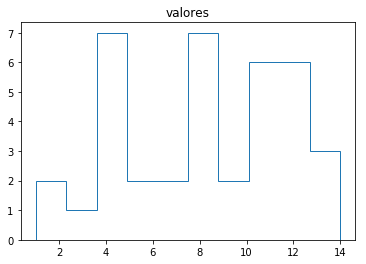

In [328]:
df.hist(histtype='step',grid=0)

In [329]:
moda = mostfreq[0]
picos_iniciais = [moda]
picos_iniciais

[(4, 7)]

In [330]:
for i in mostfreq[1:]: # ignora o primeiro
    if i[1] >= 0.7*moda[1]: # se a frequência for maior ou igual a 70% do maior, é outro pico
        picos_iniciais.append(i)

In [331]:
picos_iniciais

[(4, 7), (8, 7), (11, 6), (12, 6)]

In [332]:
# É preciso filtrar os picos pela vizinhança: só é um pico mesmo se existe um valor que não é um pico entre
# os picos
picos = [picos_iniciais[0]] # o primeiro é sempre um pico
for i in range(len(picos_iniciais)-1):
    for j in mostfreq:
        if j[0] > picos_iniciais[i][0] and j[0] < picos_iniciais[i+1][0]: # existe alguém que não é um pico entre os picos
            picos.append(picos_iniciais[i+1])
            break

In [333]:
picos

[(4, 7), (8, 7), (11, 6)]

In [334]:
# Definindo o ponto de corte entre dois picos
def ponto_corte(pico1, pico2):
    corte = 100000,100000
    for i in mostfreq:
        if i[0] >= pico1[0] and i[0] <= pico2[0]:
            if i[1] < corte[1]:
                corte = i
    return corte

In [335]:
# Divide um array em dois em um ponto de valor específico
def dividir(arr, valor):
    return arr[arr<valor], arr[~(arr<valor)]

In [336]:
entrada = np.array(data)
if len(picos) > 1: # se tiver mais de um pico, é preciso definir o(s) ponto(s) de corte
    corte = []
    for i in range(len(picos)-1):
        pico1 = picos[i]
        pico2 = picos[i+1]
        corte.append(ponto_corte(pico1,pico2)) # definição do(s) ponto(s) de corte
    # subdivisão do array de entrada no(s) ponto(s) de corte
    num_cortes = len(corte)
    histogramas = []
    for i in range(num_cortes):
        trecho_entrada,entrada = dividir(entrada,corte[i][0])
        histogramas.append(trecho_entrada)
    histogramas.append(entrada)
else: # se tiver só um pico, retorna a própria entrada
    histogramas = entrada

In [337]:
histogramas

[array([1, 2, 3, 4, 4, 4, 4, 4, 4, 4]),
 array([5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8]),
 array([ 9,  9, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 14])]